In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [3]:
# Ścieżka do folderu
folder_path = 'C:/Users/nazwa/Documents/datascience/infoshare/big_data_project/jdszr16-datapaparapa/data/raw/cosmetics/'

# Lista plików CSV w folderze
files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Wczytanie wszystkich plików CSV i połączenie ich w jeden DataFrame
df_list = [pd.read_csv(os.path.join(folder_path, file)) for file in files]
df = pd.concat(df_list, ignore_index=True)


In [4]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [5]:

# Wyświetlenie pierwszych kilku wierszy
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20692840 entries, 0 to 20692839
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ GB


In [6]:
df.shape

(20692840, 9)

In [7]:
df.describe()

,product_id,category_id,price,user_id
count,2.069284e+07,2.069284e+07,2.069284e+07,2.069284e+07
mean,5.484297e+06,1.554230e+18,8.534735e+00,5.215527e+08
std,1.305716e+06,1.691038e+17,1.938142e+01,8.744312e+07
min,3.752000e+03,1.487580e+18,-7.937000e+01,4.654960e+05
25%,5.724650e+06,1.487580e+18,2.060000e+00,4.818306e+08
50%,5.810720e+06,1.487580e+18,4.050000e+00,5.531297e+08
75%,5.857864e+06,1.487580e+18,7.060000e+00,5.788573e+08
max,5.932595e+06,2.242903e+18,3.277800e+02,6.220902e+08


In [8]:
# Filtracja po transakcjach typu 'purchase' oraz usunięcie wierszy z zerową lub ujemną ceną
df_filtered = df[(df['event_type'] == 'purchase') & (df['price'] > 0)]

In [9]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1286880 entries, 557 to 20692806
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   event_time     1286880 non-null  object 
 1   event_type     1286880 non-null  object 
 2   product_id     1286880 non-null  int64  
 3   category_id    1286880 non-null  int64  
 4   category_code  17214 non-null    object 
 5   brand          737314 non-null   object 
 6   price          1286880 non-null  float64
 7   user_id        1286880 non-null  int64  
 8   user_session   1286880 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 98.2+ MB


In [10]:
df_filtered.shape

(1286880, 9)

In [11]:
df_filtered.describe()

,product_id,category_id,price,user_id
count,1.286880e+06,1.286880e+06,1.286880e+06,1.286880e+06
mean,5.439001e+06,1.551263e+18,4.935837e+00,5.119256e+08
std,1.381477e+06,1.674150e+17,8.916221e+00,9.356561e+07
min,3.762000e+03,1.487580e+18,5.000000e-02,9.794320e+06
25%,5.712578e+06,1.487580e+18,1.590000e+00,4.689028e+08
50%,5.809310e+06,1.487580e+18,3.000000e+00,5.459982e+08
75%,5.854152e+06,1.487580e+18,5.400000e+00,5.747573e+08
max,5.932583e+06,2.242903e+18,3.277800e+02,6.220732e+08


In [12]:

# Zamiana na datetime
df_filtered.loc[:, 'event_time'] = pd.to_datetime(df_filtered['event_time'])


In [13]:
df_filtered['event_time']

557         2019-12-01 00:17:50+00:00
558         2019-12-01 00:17:50+00:00
559         2019-12-01 00:17:50+00:00
560         2019-12-01 00:17:50+00:00
561         2019-12-01 00:17:50+00:00
                      ...            
20692802    2020-01-31 23:58:26+00:00
20692803    2020-01-31 23:58:26+00:00
20692804    2020-01-31 23:58:26+00:00
20692805    2020-01-31 23:58:26+00:00
20692806    2020-01-31 23:58:26+00:00
Name: event_time, Length: 1286880, dtype: object

In [14]:

# Agregacja danych po użytkowniku: Recency, Frequency, Monetary
df_rfm = df_filtered.groupby('user_id').agg(
    recency=('event_time', lambda x: (x.max() - x.min()).days),  # Obliczenie Recency jako różnicy dni od ostatniego zakupu
    frequency=('user_id', 'count'),  # Obliczenie Frequency jako liczby transakcji
    monetary=('price', 'sum')  # Obliczenie Monetary jako sumy wydatków
).reset_index()

In [15]:
df_rfm

,user_id,recency,frequency,monetary
0,9794320,0,4,12.68
1,10079204,0,2,25.81
2,10280338,90,86,177.83
3,12055855,0,4,16.54
4,12936739,0,2,29.89
...,...,...,...,...
110513,622065819,0,4,20.48
110514,622066161,0,4,12.95
110515,622067983,0,10,66.48
110516,622069477,0,1,0.95


In [16]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110518 entries, 0 to 110517
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    110518 non-null  int64  
 1   recency    110518 non-null  int64  
 2   frequency  110518 non-null  int64  
 3   monetary   110518 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 3.4 MB


In [17]:
df_rfm.shape

(110518, 4)

In [18]:
df_rfm.describe()

,user_id,recency,frequency,monetary
count,1.105180e+05,110518.000000,110518.000000,110518.000000
mean,5.286080e+08,11.094184,11.644076,57.473265
std,8.754739e+07,28.443430,18.265277,88.639681
min,9.794320e+06,0.000000,1.000000,0.130000
25%,4.950943e+08,0.000000,3.000000,16.270000
50%,5.598500e+08,0.000000,6.000000,33.220000
75%,5.862527e+08,0.000000,13.000000,61.580000
max,6.220732e+08,151.000000,715.000000,3785.030000


In [19]:

# Logarytmowanie wartości Monetary (dodanie 1, aby uniknąć log(0))
df_rfm['monetary_log'] = np.log(df_rfm['monetary'] + 1)


In [20]:
df_rfm

,user_id,recency,frequency,monetary,monetary_log
0,9794320,0,4,12.68,2.615935
1,10079204,0,2,25.81,3.288775
2,10280338,90,86,177.83,5.186436
3,12055855,0,4,16.54,2.864484
4,12936739,0,2,29.89,3.430433
...,...,...,...,...,...
110513,622065819,0,4,20.48,3.067122
110514,622066161,0,4,12.95,2.635480
110515,622067983,0,10,66.48,4.211831
110516,622069477,0,1,0.95,0.667829


In [21]:

# Skalowanie cech (Recency, Frequency, Monetary)
scaler = StandardScaler()
df_rfm_scaled = scaler.fit_transform(df_rfm[['recency', 'frequency', 'monetary_log']])


In [22]:
scaler

StandardScaler()

In [23]:
df_rfm_scaled

array([[-0.39004557, -0.41850504, -0.99668581],
       [-0.39004557, -0.52800291, -0.28811226],
       [ 2.77414408,  4.07090779,  1.71033028],
       ...,
       [-0.39004557, -0.09001142,  0.68396615],
       [-0.39004557, -0.58275185, -3.04825226],
       [-0.39004557, -0.58275185, -2.09743463]])

In [24]:

# Zamiana na DataFrame po skalowaniu
df_rfm_scaled = pd.DataFrame(df_rfm_scaled, columns=['recency', 'frequency', 'monetary_log'])


In [25]:
df_rfm_scaled

,recency,frequency,monetary_log
0,-0.390046,-0.418505,-0.996686
1,-0.390046,-0.528003,-0.288112
2,2.774144,4.070908,1.710330
3,-0.390046,-0.418505,-0.734937
4,-0.390046,-0.528003,-0.138931
...,...,...,...
110513,-0.390046,-0.418505,-0.521537
110514,-0.390046,-0.418505,-0.976103
110515,-0.390046,-0.090011,0.683966
110516,-0.390046,-0.582752,-3.048252


In [26]:
df_rfm_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110518 entries, 0 to 110517
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   recency       110518 non-null  float64
 1   frequency     110518 non-null  float64
 2   monetary_log  110518 non-null  float64
dtypes: float64(3)
memory usage: 2.5 MB


In [27]:
df_rfm_scaled.shape

(110518, 3)

In [28]:

# Klastrowanie za pomocą KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df_rfm['cluster'] = kmeans.fit_predict(df_rfm_scaled)

# Sprawdzenie wyników klastrowania (średnie wartości cech dla każdego klastra)
print(df_rfm.groupby('cluster').mean())

# Obliczenie silhouette score dla oceny jakości klastrowania
score = silhouette_score(df_rfm_scaled, df_rfm['cluster'])
print(f"Silhouette Score: {score}")


              user_id    recency   frequency    monetary  monetary_log
cluster                                                               
0        5.314140e+08   2.058266    8.122092   45.441038      3.772689
1        4.777508e+08  86.912322   24.077429  117.983152      4.555279
2        5.262820e+08  11.034134   26.285198  133.731753      4.780980
3        4.789619e+08  89.216527  101.084401  440.619598      5.952993
4        5.398744e+08   0.337944    3.571545   14.029325      2.631840
Silhouette Score: 0.4447257366937


In [33]:
import os
from joblib import dump

# Ścieżka bazowa projektu
base_dir = r'C:\Users\nazwa\Documents\datascience\infoshare\big_data_project\jdszr16-datapaparapa'

# Ścieżka do katalogu 'models'
models_dir = os.path.join(base_dir, 'models')
os.makedirs(models_dir, exist_ok=True)  # Tworzenie katalogu, jeśli nie istnieje

# Ścieżka do pliku modelu
model_path = os.path.join(models_dir, 'model_kmeans_cosmetic_02.joblib')

# Zapis modelu K-Means do pliku w katalogu 'models'
dump(kmeans, model_path)

print(f"Model K-Means został zapisany w: {model_path}")

Model K-Means został zapisany w: C:\Users\nazwa\Documents\datascience\infoshare\big_data_project\jdszr16-datapaparapa\models\model_kmeans_cosmetic_02.joblib


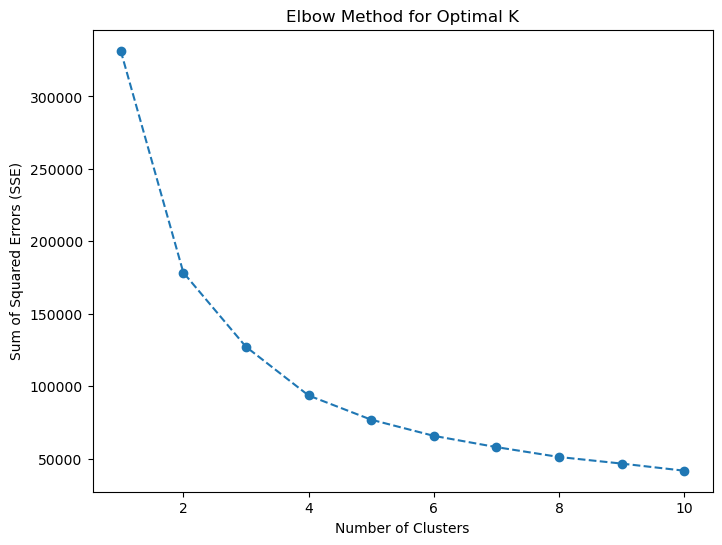

In [29]:
SSE = []
for i in range(1, 11):  # Testujemy liczbę klastrów od 1 do 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_rfm_scaled)
    SSE.append(kmeans.inertia_)

# Wizualizacja
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), SSE, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.show()


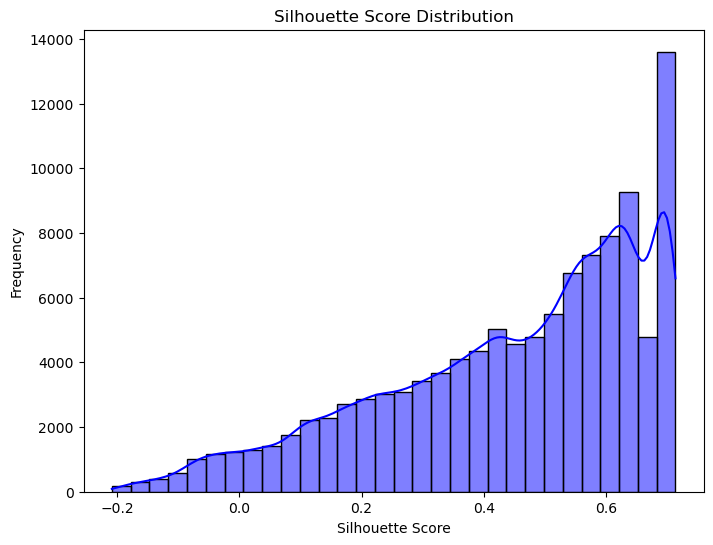

In [30]:
# Wizualizacja silhouette score dla każdego punktu w danych
from sklearn.metrics import silhouette_samples
import numpy as np

silhouette_values = silhouette_samples(df_rfm_scaled, df_rfm['cluster'])

plt.figure(figsize=(8, 6))
sns.histplot(silhouette_values, bins=30, kde=True, color='blue')
plt.title("Silhouette Score Distribution")
plt.xlabel("Silhouette Score")
plt.ylabel("Frequency")
plt.show()


In [31]:
silhouette_score

<function sklearn.metrics.cluster._unsupervised.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)>